In [1]:
pip install nltk gensim pyLDAvis wordcloud matplotlib pandas konlpy

In [2]:
import random
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한국어를 위한 konlpy 설치
from konlpy.tag import Okt
okt = Okt()

In [3]:
import random
import pandas as pd

random_reviews = [
    # 긍정적인 리뷰
    "서비스가 정말 친절하고 좋았어요.",
    "음식이 너무 맛있고 분위기도 좋아요!",
    "가격 대비 품질이 정말 좋네요. 재방문 의사 있습니다.",
    "친구들과 함께 즐거운 시간을 보냈습니다.",
    "배달이 빨랐고 음식도 따뜻했어요.",
    "직원분들이 너무 친절하셔서 기분 좋게 다녀왔습니다.",
    "매장이 깔끔하고 청결해서 마음에 들었어요.",
    "메뉴가 다양하고 맛도 훌륭합니다. 추천드려요!",
    "조명이 은은해서 분위기가 정말 좋았어요.",
    "커피 맛이 아주 훌륭하고 디저트도 만족스러웠습니다.",

    # 중립적인 리뷰
    "음식 맛은 보통이었지만 분위기는 괜찮았습니다.",
    "특별히 나쁜 점은 없었지만 기억에 남는 부분도 없네요.",
    "주차 공간이 넉넉하지는 않지만 이용은 가능했습니다.",
    "매장이 조금 붐비긴 했지만 서비스는 괜찮았습니다.",
    "음식은 적당한 수준이었고 대기 시간이 조금 길었습니다.",
    "기대보다는 평범했지만, 크게 불만은 없어요.",
    "메뉴 구성이 조금 단조로웠습니다.",
    "조금 더 청결했으면 좋았을 것 같아요.",
    "배달이 조금 늦었지만 음식은 따뜻했어요.",
    "가성비는 괜찮은 편이었습니다.",

    # 부정적인 리뷰
    "음식이 너무 짜고 느끼했습니다. 실망이에요.",
    "서비스가 엉망이어서 다시 방문하고 싶지 않아요.",
    "주차장이 너무 좁아서 이용하기 불편했어요.",
    "직원들이 불친절해서 불쾌했습니다.",
    "배달이 너무 늦고 포장이 엉망이었어요.",
    "청결 상태가 좋지 않아 불편했어요.",
    "음식이 차갑게 나왔고 맛이 없었습니다.",
    "가격이 너무 비싸고 양도 적어요.",
    "기대와는 다르게 품질이 떨어졌습니다.",
    "환불 처리가 너무 느려서 불편했습니다."
]

# 데이터프레임으로 변환
random.shuffle(random_reviews)

# 데이터프레임으로 변환
df = pd.DataFrame({"review": random_reviews})
print(df)


                            review
0            음식이 차갑게 나왔고 맛이 없었습니다.
1     직원분들이 너무 친절하셔서 기분 좋게 다녀왔습니다.
2           조명이 은은해서 분위기가 정말 좋았어요.
3             음식이 너무 맛있고 분위기도 좋아요!
4               메뉴 구성이 조금 단조로웠습니다.
5        메뉴가 다양하고 맛도 훌륭합니다. 추천드려요!
6            환불 처리가 너무 느려서 불편했습니다.
7   음식은 적당한 수준이었고 대기 시간이 조금 길었습니다.
8             기대와는 다르게 품질이 떨어졌습니다.
9                 가성비는 괜찮은 편이었습니다.
10              서비스가 정말 친절하고 좋았어요.
11              배달이 빨랐고 음식도 따뜻했어요.
12       음식 맛은 보통이었지만 분위기는 괜찮았습니다.
13  특별히 나쁜 점은 없었지만 기억에 남는 부분도 없네요.
14         주차장이 너무 좁아서 이용하기 불편했어요.
15              직원들이 불친절해서 불쾌했습니다.
16    커피 맛이 아주 훌륭하고 디저트도 만족스러웠습니다.
17         매장이 깔끔하고 청결해서 마음에 들었어요.
18              가격이 너무 비싸고 양도 적어요.
19    주차 공간이 넉넉하지는 않지만 이용은 가능했습니다.
20      서비스가 엉망이어서 다시 방문하고 싶지 않아요.
21        기대보다는 평범했지만, 크게 불만은 없어요.
22     매장이 조금 붐비긴 했지만 서비스는 괜찮았습니다.
23             청결 상태가 좋지 않아 불편했어요.
24  가격 대비 품질이 정말 좋네요. 재방문 의사 있습니다.
25           배달이 너무 늦고 포장이 엉망이었어요.
26          배달이 조금 늦었지만 음식은 따뜻했어요.
27          친구들과 함께 

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# 불용어 정의
stop_words = set(["이", "가", "은", "는", "의", "을", "에", "에서", "도", "다", "그리고", "너무", "아주", "없다", "하다", "않다", "와는","이다"])

# 토큰화 및 불용어 제거
def preprocess_text(text):
    tokens = okt.morphs(text, stem=True)  # 형태소 분석
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]  # 불용어 제거
    return tokens

df["tokens"] = df["review"].apply(preprocess_text)
print(df)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                            review                              tokens
0            음식이 차갑게 나왔고 맛이 없었습니다.                      [음식, 차갑다, 나오다]
1     직원분들이 너무 친절하셔서 기분 좋게 다녀왔습니다.        [직원, 분들, 친절하다, 기분, 좋다, 다녀오다]
2           조명이 은은해서 분위기가 정말 좋았어요.             [조명, 은은하다, 분위기, 정말, 좋다]
3             음식이 너무 맛있고 분위기도 좋아요!                  [음식, 맛있다, 분위기, 좋다]
4               메뉴 구성이 조금 단조로웠습니다.                  [메뉴, 구성, 조금, 단조롭다]
5        메뉴가 다양하고 맛도 훌륭합니다. 추천드려요!           [메뉴, 다양하다, 훌륭하다, 추천, 드리다]
6            환불 처리가 너무 느려서 불편했습니다.                 [환불, 처리, 느리다, 불편하다]
7   음식은 적당한 수준이었고 대기 시간이 조금 길었습니다.  [음식, 적당하다, 수준, 이다, 대기, 시간, 조금, 길다]
8             기대와는 다르게 품질이 떨어졌습니다.                 [기대, 다르다, 품질, 떨어지다]
9                 가성비는 괜찮은 편이었습니다.                   [가성, 비다, 괜찮다, 펴다]
10              서비스가 정말 친절하고 좋았어요.                 [서비스, 정말, 친절하다, 좋다]
11              배달이 빨랐고 음식도 따뜻했어요.                 [배달, 빨르다, 음식, 따뜻하다]
12       음식 맛은 보통이었지만 분위기는 괜찮았습니다.              [음식, 보통, 이다, 분위기, 괜찮다]
13  특별

In [5]:
# Gensim을 위한 Dictionary와 Corpus 생성
dictionary = corpora.Dictionary(df["tokens"])
corpus = [dictionary.doc2bow(tokens) for tokens in df["tokens"]]

# LDA 모델 학습
num_topics = 3  # 토픽 수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# PyLDAvis 준비 및 시각화
pyldavis_prepared = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(pyldavis_prepared)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
!apt-get update -qq
!apt-get install fonts-nanum -qq

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


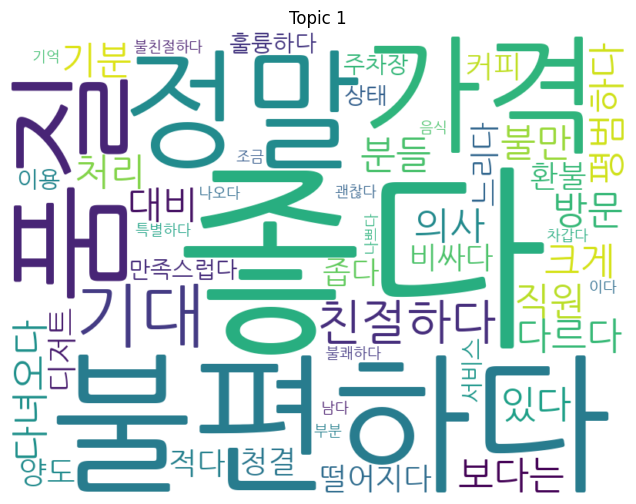

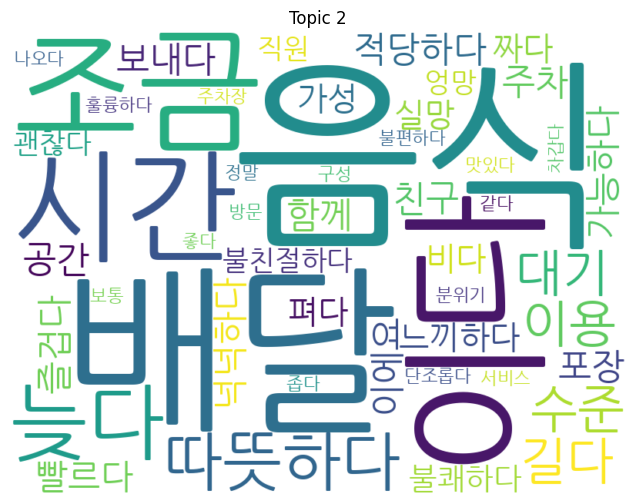

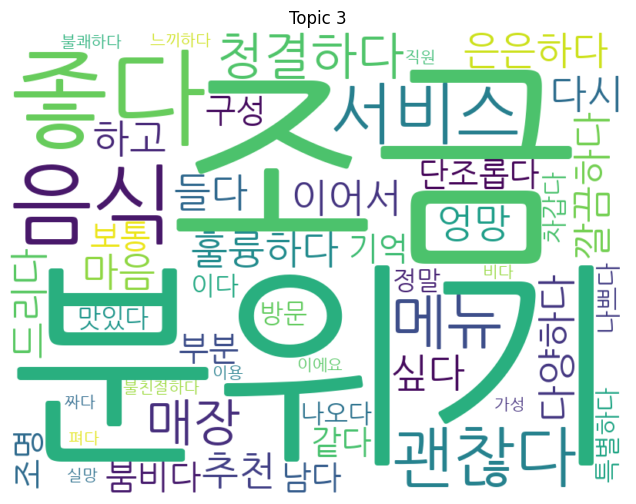

In [8]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 각 토픽에 대한 워드클라우드 생성
for topic_id in range(num_topics):
    plt.figure(figsize=(8, 6))

    # 토픽별 단어 추출
    topic_words = lda_model.show_topic(topic_id, topn=50)
    word_freq = {word: freq for word, freq in topic_words}

    # 워드클라우드 생성
    wordcloud = WordCloud(font_path=font_path,  # 한국어 폰트
                          width=800, height=600, background_color="white").generate_from_frequencies(word_freq)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_id + 1}")
    plt.show()
